In [1]:
# Install required libraries
!pip install --upgrade pypdf2
!pip install transformers==4.23.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 25.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:
      Successfully uninstalled transformers-4.41.2


In [2]:
import PyPDF2 as pdf
import numpy as np
import torch
import pandas as pd
from google.colab import files
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
# Step #2: Function to upload and read PDF file
def upload_and_read_pdf():
    with open(files, "rb") as f:
         reader = pdf.PdfReader(f)
         text = ""
         for page_num in range(len(reader.pages)):
             page = reader.pages[page_num]
             text += page.extract_text()
    return text

# Step 3: Calculate Perplexity
def calculate_perplexity(text):
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
    model = GPT2LMHeadModel.from_pretrained('gpt2')

    tokens = tokenizer.encode(text, return_tensors='pt')
    max_length = 1024
    stride = 512
    lls = []

    for i in range(0, tokens.size(1), stride):
        begin_loc = max(i + stride - max_length, 0)
        end_loc = min(i + stride, tokens.size(1))
        trg_len = end_loc - i  # may be different from stride on last loop
        input_ids = tokens[:, begin_loc:end_loc]
        target_ids = input_ids.clone()
        target_ids[:, :-trg_len] = -100

        with torch.no_grad():
            outputs = model(input_ids, labels=target_ids)
            log_likelihood = outputs[0] * trg_len

        lls.append(log_likelihood)

    perplexity = torch.exp(torch.stack(lls).sum() / end_loc)
    return perplexity.item()

# Step 4: Analyze Burstiness
def calculate_burstiness(text):
    sentences = text.split('.')
    sentence_lengths = [len(sentence.split()) for sentence in sentences if sentence]

    mean_length = np.mean(sentence_lengths)
    std_dev = np.std(sentence_lengths)

    burstiness = std_dev / mean_length if mean_length else 0
    return burstiness

In [4]:
# Step 1: Upload the PDF file
uploaded = files.upload()
filenames = uploaded.keys()
lista_AI = list(filenames)
lista_AI

Saving Abstract_1.pdf to Abstract_1.pdf
Saving Abstract_2.pdf to Abstract_2.pdf
Saving Abstract_3.pdf to Abstract_3.pdf
Saving abstract_ai_1.pdf to abstract_ai_1.pdf
Saving abstract_ai_2.pdf to abstract_ai_2.pdf
Saving abstract_ai_3.pdf to abstract_ai_3.pdf
Saving abstract_ai_4.pdf to abstract_ai_4.pdf
Saving abstract_ai_5.pdf to abstract_ai_5.pdf
Saving abstract_ai_6.pdf to abstract_ai_6.pdf
Saving abstract_ai_7.pdf to abstract_ai_7.pdf
Saving abstract_ai_8.pdf to abstract_ai_8.pdf
Saving abstract_ai_9.pdf to abstract_ai_9.pdf
Saving abstract_ai_10.pdf to abstract_ai_10.pdf
Saving abstract_ai_11.pdf to abstract_ai_11.pdf
Saving abstract_ai_12.pdf to abstract_ai_12.pdf
Saving abstract_ai_13.pdf to abstract_ai_13.pdf
Saving abstract_ai_14.pdf to abstract_ai_14.pdf
Saving abstract_ai_15.pdf to abstract_ai_15.pdf
Saving abstract_ai_16.pdf to abstract_ai_16.pdf
Saving abstract_ai_17.pdf to abstract_ai_17.pdf
Saving abstract_ai_18.pdf to abstract_ai_18.pdf
Saving abstract_ai_19.pdf to abstr

['Abstract_1.pdf',
 'Abstract_2.pdf',
 'Abstract_3.pdf',
 'abstract_ai_1.pdf',
 'abstract_ai_2.pdf',
 'abstract_ai_3.pdf',
 'abstract_ai_4.pdf',
 'abstract_ai_5.pdf',
 'abstract_ai_6.pdf',
 'abstract_ai_7.pdf',
 'abstract_ai_8.pdf',
 'abstract_ai_9.pdf',
 'abstract_ai_10.pdf',
 'abstract_ai_11.pdf',
 'abstract_ai_12.pdf',
 'abstract_ai_13.pdf',
 'abstract_ai_14.pdf',
 'abstract_ai_15.pdf',
 'abstract_ai_16.pdf',
 'abstract_ai_17.pdf',
 'abstract_ai_18.pdf',
 'abstract_ai_19.pdf',
 'abstract_ai_20.pdf',
 'abstract_ai_21.pdf',
 'abstract_ai_22.pdf',
 'abstract_ai_23.pdf',
 'abstract_ai_24.pdf',
 'abstract_ai_25.pdf',
 'abstract_ai_26.pdf',
 'abstract_ai_27.pdf',
 'abstract_ai_28.pdf',
 'abstract_ai_29.pdf',
 'abstract_ai_30.pdf',
 'abstract_ai_32.pdf',
 'abstract_ai_33.pdf',
 'abstract_ai_34.pdf',
 'abstract_ai_35.pdf',
 'abstract_ai_36.pdf',
 'abstract_ai_37.pdf',
 'abstract_ai_38.pdf',
 'abstract_ai_39.pdf',
 'abstract_ai_40.pdf',
 'abstract_ai_41.pdf',
 'abstract_ai_42.pdf',
 'abstrac

In [5]:
# Main execution
if __name__ == "__main__":
    lista_perplexity = []
    lista_burstiness = []
    lista_token_length = []
    lista_word_counts = []
    lista_character_counts = []
    lista_sentence_count = []
    lista_mean_length = []
    lista_std_sentence_length = []
    for files in lista_AI:
        text = upload_and_read_pdf()
        perplexity = calculate_perplexity(text)
        lista_perplexity.append(perplexity)
        burstiness = calculate_burstiness(text)
        lista_burstiness.append(burstiness)
        tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
        token_length = len(tokenizer.encode(text))
        lista_token_length.append(token_length)
        word_counts = len(text.split())
        sentences = text.split('.')
        sentence_count = len(sentences)
        lista_sentence_count.append(sentence_count)
        sentence_lengths = [len(sentence.split()) for sentence in sentences if sentence]
        mean_length = np.mean(sentence_lengths)
        lista_mean_length.append(mean_length)
        std_dev = np.std(sentence_lengths)
        lista_std_sentence_length.append(std_dev)
        lista_word_counts.append(word_counts)
        character_counts = len(text)
        lista_character_counts.append(character_counts)


df_AI = pd.DataFrame({'text': lista_AI, 'Token': lista_token_length, 'word counts':  lista_word_counts,
                         'character counts': lista_character_counts, 'sentence count': lista_sentence_count,
                         'std sentence length': lista_std_sentence_length, 'mean sentence length': lista_mean_length,
                         'Perplexity': lista_perplexity, 'Burstiness': lista_burstiness, 'AI Metric': 1})
df_AI

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1119 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1119 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1227 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1227 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1191 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence leng

,text,Token,word counts,character counts,sentence count,std sentence length,mean sentence length,Perplexity,Burstiness,AI Metric
0,Abstract_1.pdf,311,185,1466,8,9.942805,23.125000,33.491039,0.429959,1
1,Abstract_2.pdf,305,186,1469,9,8.041559,20.666667,33.902081,0.389108,1
2,Abstract_3.pdf,286,177,1372,8,9.726735,22.125000,41.777264,0.439626,1
3,abstract_ai_1.pdf,279,174,1351,9,7.408704,19.333333,27.337112,0.383209,1
4,abstract_ai_2.pdf,284,200,1462,8,10.735455,25.000000,23.763338,0.429418,1
...,...,...,...,...,...,...,...,...,...,...
411,introduction_ai_97.pdf,240,165,1331,8,8.395497,20.625000,36.708584,0.407054,1
412,introduction_ai_98.pdf,271,195,1462,9,10.077478,21.666667,32.559368,0.465114,1
413,introduction_ai_99.pdf,475,328,2376,14,8.457577,23.428571,19.140295,0.360994,1
414,introduction_ai_100.pdf,428,289,1980,13,8.549888,22.230769,22.611324,0.384597,1


In [6]:
# Step 1: Upload the PDF file
from google.colab import files
uploaded = files.upload()
filenames = uploaded.keys()
lista_Human = list(filenames)
lista_Human

Saving abstract_human_1.pdf to abstract_human_1.pdf
Saving abstract_human_2.pdf to abstract_human_2.pdf
Saving abstract_human_3.pdf to abstract_human_3.pdf
Saving abstract_human_4.pdf to abstract_human_4.pdf
Saving abstract_human_5.pdf to abstract_human_5.pdf
Saving abstract_human_6.pdf to abstract_human_6.pdf
Saving abstract_human_7.pdf to abstract_human_7.pdf
Saving abstract_human_8.pdf to abstract_human_8.pdf
Saving abstract_human_9.pdf to abstract_human_9.pdf
Saving abstract_human_10.pdf to abstract_human_10.pdf
Saving abstract_human_11.pdf to abstract_human_11.pdf
Saving abstract_human_12.pdf to abstract_human_12.pdf
Saving abstract_human_13.pdf to abstract_human_13.pdf
Saving abstract_human_14.pdf to abstract_human_14.pdf
Saving abstract_human_15.pdf to abstract_human_15.pdf
Saving abstract_human_16.pdf to abstract_human_16.pdf
Saving abstract_human_17.pdf to abstract_human_17.pdf
Saving abstract_human_18.pdf to abstract_human_18.pdf
Saving abstract_human_19.pdf to abstract_human

['abstract_human_1.pdf',
 'abstract_human_2.pdf',
 'abstract_human_3.pdf',
 'abstract_human_4.pdf',
 'abstract_human_5.pdf',
 'abstract_human_6.pdf',
 'abstract_human_7.pdf',
 'abstract_human_8.pdf',
 'abstract_human_9.pdf',
 'abstract_human_10.pdf',
 'abstract_human_11.pdf',
 'abstract_human_12.pdf',
 'abstract_human_13.pdf',
 'abstract_human_14.pdf',
 'abstract_human_15.pdf',
 'abstract_human_16.pdf',
 'abstract_human_17.pdf',
 'abstract_human_18.pdf',
 'abstract_human_19.pdf',
 'abstract_human_20.pdf',
 'abstract_human_21.pdf',
 'abstract_human_22.pdf',
 'abstract_human_23.pdf',
 'abstract_human_24.pdf',
 'abstract_human_25.pdf',
 'abstract_human_26.pdf',
 'abstract_human_27.pdf',
 'abstract_human_28.pdf',
 'abstract_human_29.pdf',
 'abstract_human_30.pdf',
 'abstract_human_31.pdf',
 'abstract_human_32.pdf',
 'abstract_human_33.pdf',
 'abstract_human_34.pdf',
 'abstract_human_35.pdf',
 'abstract_human_36.pdf',
 'abstract_human_37.pdf',
 'abstract_human_38.pdf',
 'abstract_human_39.p

In [7]:
# Main execution
if __name__ == "__main__":
    lista_perplexity = []
    lista_burstiness = []
    lista_score = []
    lista_token_length = []
    lista_word_counts = []
    lista_character_counts = []
    lista_sentence_count = []
    lista_mean_length = []
    lista_std_sentence_length = []
    for files in lista_Human:
        text = upload_and_read_pdf()
        perplexity = calculate_perplexity(text)
        lista_perplexity.append(perplexity)
        burstiness = calculate_burstiness(text)
        lista_burstiness.append(burstiness)
        tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
        token_length = len(tokenizer.encode(text))
        lista_token_length.append(token_length)
        word_counts = len(text.split())
        sentences = text.split('.')
        sentence_count = len(sentences)
        lista_sentence_count.append(sentence_count)
        sentence_lengths = [len(sentence.split()) for sentence in sentences if sentence]
        mean_length = np.mean(sentence_lengths)
        lista_mean_length.append(mean_length)
        std_dev = np.std(sentence_lengths)
        lista_std_sentence_length.append(std_dev)
        lista_word_counts.append(word_counts)
        character_counts = len(text)
        lista_character_counts.append(character_counts)

df_Human = pd.DataFrame({'text': lista_Human, 'Token': lista_token_length, 'word counts':  lista_word_counts,
                         'character counts': lista_character_counts, 'sentence count': lista_sentence_count,
                         'std sentence length': lista_std_sentence_length, 'mean sentence length': lista_mean_length,
                         'Perplexity': lista_perplexity, 'Burstiness': lista_burstiness, 'AI Metric': 0})
df_Human

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (1062 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1062 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1622 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1622 > 1024). Running this sequence through the model will result

,text,Token,word counts,character counts,sentence count,std sentence length,mean sentence length,Perplexity,Burstiness,AI Metric
0,abstract_human_1.pdf,310,222,1367,11,13.412095,20.454545,72.494568,0.655702,0
1,abstract_human_2.pdf,385,263,1822,11,13.453317,23.909091,41.398609,0.562686,0
2,abstract_human_3.pdf,188,125,895,9,10.252371,14.000000,59.400230,0.732312,0
3,abstract_human_4.pdf,257,153,1060,11,11.260991,14.090909,45.392136,0.799167,0
4,abstract_human_5.pdf,216,121,860,9,17.889234,13.555556,105.370689,1.319698,0
...,...,...,...,...,...,...,...,...,...,...
413,text_human_96.pdf,337,215,1360,10,14.029968,21.600000,36.907997,0.649536,0
414,text_human_97.pdf,254,151,1127,9,8.337036,16.777778,39.660614,0.496909,0
415,text_human_98.pdf,1307,812,5764,34,12.106791,23.882353,35.146542,0.506935,0
416,text_human_99.pdf,325,202,1446,10,12.710625,20.200000,56.095028,0.629239,0


In [8]:
# Step 5: Prepare the classifier
# Normally we would need labeled data for training, here we use dummy data
# Replace this with your actual labeled dataset

df = pd.concat([df_AI, df_Human], ignore_index=True,axis=0)
df = df.sample(frac=1).reset_index()
df = df[(df.Token < 1024)]
df

,index,text,Token,word counts,character counts,sentence count,std sentence length,mean sentence length,Perplexity,Burstiness,AI Metric
0,667,introduction_human_48.pdf,1008,647,4321,33,8.906308,19.636364,27.665525,0.453562,0
1,648,introduction_human_28.pdf,221,164,979,6,21.390548,27.333333,55.132133,0.782581,0
2,640,introduction_human_20.pdf,974,601,4340,38,9.979931,16.078947,27.705791,0.620683,0
3,410,introduction_ai_96.pdf,401,275,2066,11,10.583005,25.000000,28.394629,0.423320,1
4,805,text_human_72.pdf,257,161,1162,8,10.203400,20.125000,45.532032,0.507001,0
...,...,...,...,...,...,...,...,...,...,...,...
829,347,introduction_ai_32.pdf,560,398,2684,16,10.024189,24.875000,13.802768,0.402982,1
830,811,text_human_78.pdf,418,246,1714,16,11.772419,15.687500,63.236282,0.750433,0
831,590,conclusion_human_76.pdf,243,139,866,9,7.212814,15.444444,44.516888,0.467017,0
832,54,abstract_ai_53.pdf,254,166,1250,9,7.380321,18.444444,29.366741,0.400138,1


In [9]:
X = df.drop(columns=['index', 'text', 'AI Metric'])
y = df['AI Metric']

**Redução da dimensionalidade**

Number of Dimensions: 4


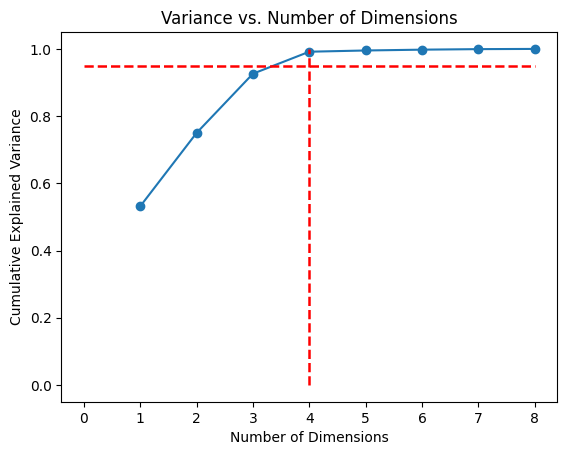

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Standardize features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the variance ratio

explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance

cumulative_variance = np.cumsum(explained_variance_ratio)

# Number of dimensions up to 95% variance

num_dimensions = np.argmax(cumulative_variance >= 0.95) + 1

print("Number of Dimensions:", num_dimensions)

# Plot the variance as a function of the number of dimensions

plt.plot(np.arange(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance vs. Number of Dimensions')
plt.hlines(0.95, 0, 8, linewidth=1.8, linestyle='--', color="red")
plt.vlines(num_dimensions, 0, 1.0, linewidth=1.8, linestyle='--', color="red")
plt.grid(False)
plt.show()

In [11]:
# PCA with the selected number of dimensions

pca = PCA(n_components=num_dimensions)
X_pca_selected = pca.fit_transform(X_scaled)


# Print transformed data

#print("Transformed Data:")
#print(X_pca_selected)

# Get the most important features and their weights

num_features = X.shape[1]  # Number of features (original number of columns)
feature_names = X.columns[:-1]  # Names of the features (all columns except the last one)

# Get PCA absolute weights

pc1_weights = np.abs(pca.components_[0])

# Sort the features based on their weights (descending order)

sorted_indices = np.argsort(pc1_weights)[::-1]
sorted_features = feature_names[sorted_indices-1]
sorted_weights = pc1_weights[sorted_indices]

# List most important features and their weights

#print("Most Important Features and Weights:")
feature_list = []
weight_list = []
for feature, weight in zip(sorted_features, sorted_weights):
    feature_list.append(feature)
    weight_list.append(weight)

print("Most Important",  num_dimensions," Features:", feature_list[:num_dimensions])
print("Most Important",  num_dimensions," Weights:", weight_list[:num_dimensions])

Most Important 4  Features: ['word counts', 'Token', 'Perplexity', 'character counts']
Most Important 4  Weights: [0.4748584761772058, 0.4707892808062728, 0.46586221742289796, 0.4411861102157408]


In [12]:
X = df[[*feature_list[:num_dimensions]]]
X

,word counts,Token,Perplexity,character counts
0,647,1008,27.665525,4321
1,164,221,55.132133,979
2,601,974,27.705791,4340
3,275,401,28.394629,2066
4,161,257,45.532032,1162
...,...,...,...,...
829,398,560,13.802768,2684
830,246,418,63.236282,1714
831,139,243,44.516888,866
832,166,254,29.366741,1250


In [13]:
#X = df.drop(columns=['index', 'text', 'AI Metric'])
#y = df['AI Metric']

# Train-test split (here using the same data for simplicity)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Define the model pipeline

model = make_pipeline(StandardScaler(), LogisticRegression())

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [14]:
# Step 6: Predict if the text is AI-generated or human-written
AI_train = model.predict(X_train)
AI_predicted = model.predict(X_test)
result = pd.DataFrame({'AI_tested': y_test, 'AI Predicted': AI_predicted})
result

,AI_tested,AI Predicted
732,0,0
361,1,1
685,1,0
754,0,0
521,1,1
...,...,...
727,0,0
106,0,1
490,0,0
753,0,0


In [15]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef

accuracy = accuracy_score(y_train, AI_train)
precision = precision_score(y_train, AI_train)
recall = recall_score(y_train, AI_train)

precision_s = precision_score(y_train, AI_train,average='micro')
recall_s    = recall_score(y_train, AI_train, average='micro')

print("Precision    : ", precision)
print("Recall       : ", recall)
print("F1_score     : ", 2*((precision_s*recall_s)/(precision_s + recall_s)))
print("Accuracy     : ", accuracy)
print("MCC          : ", matthews_corrcoef(y_train, AI_train))
print("Cohen´kappa  : ", cohen_kappa_score(y_train, AI_train))

Precision    :  0.880184331797235
Recall       :  0.9317073170731708
F1_score     :  0.8958333333333334
Accuracy     :  0.8958333333333334
MCC          :  0.7913884901643086
Cohen´kappa  :  0.7898136237992281


In [16]:
accuracy = accuracy_score(y_test, AI_predicted)
precision = precision_score(y_test, AI_predicted)
recall = recall_score(y_test, AI_predicted)

precision_s = precision_score(y_test, AI_predicted,average='micro')
recall_s    = recall_score(y_test, AI_predicted, average='micro')

print("Precision    : ", precision)
print("Recall       : ", recall)
print("F1_score     : ", 2*((precision_s*recall_s)/(precision_s + recall_s)))
print("Accuracy     : ", accuracy)
print("MCC          : ", matthews_corrcoef(y_test, AI_predicted))
print("Cohen´kappa  : ", cohen_kappa_score(y_test, AI_predicted))

Precision    :  0.8952380952380953
Recall       :  0.912621359223301
F1_score     :  0.8961038961038962
Accuracy     :  0.8961038961038961
MCC          :  0.7910475198738893
Cohen´kappa  :  0.7908745247148289


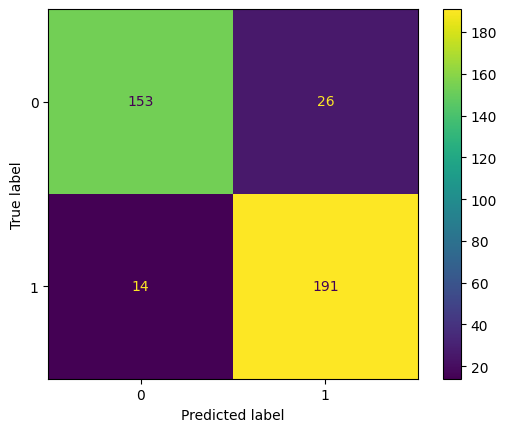

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_train, AI_train)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

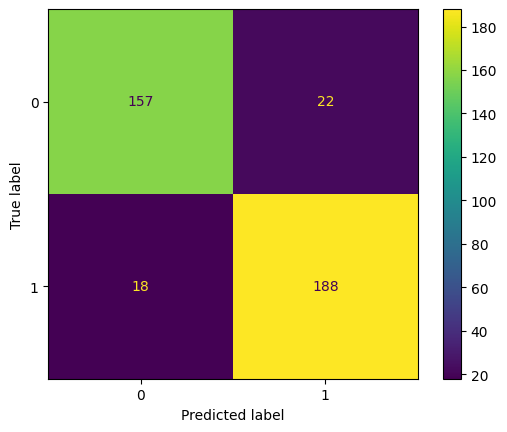

In [18]:
# Create the confusion matrix
cm = confusion_matrix(y_test, AI_predicted)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

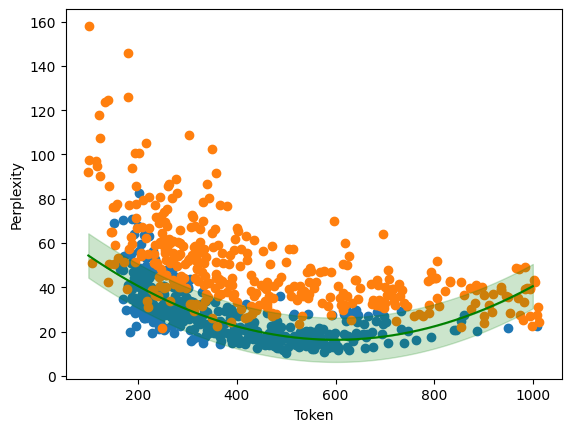

In [19]:
df_AI = df_AI[(df_AI.Token < 1024)]
df_Human = df_Human[(df_Human.Token < 1024)]

plt.scatter(df_AI.Token, df_AI.Perplexity)
plt.scatter(df_Human.Token, df_Human.Perplexity)
plt.xlabel('Token')
plt.ylabel('Perplexity')
linear_model = np.polyfit(df_AI.Token, df_AI.Perplexity, 2)
linear_model_fn = np.poly1d(linear_model)
x_s = np.arange(100, 1000)
plt.plot(x_s, linear_model_fn(x_s), color="green")
plt.fill_between(x_s, linear_model_fn(x_s), linear_model_fn(x_s)+np.std(linear_model_fn(x_s)), alpha=0.2, color="green")
plt.fill_between(x_s, linear_model_fn(x_s), linear_model_fn(x_s)-np.std(linear_model_fn(x_s)), alpha=0.2, color="green")
plt.show()

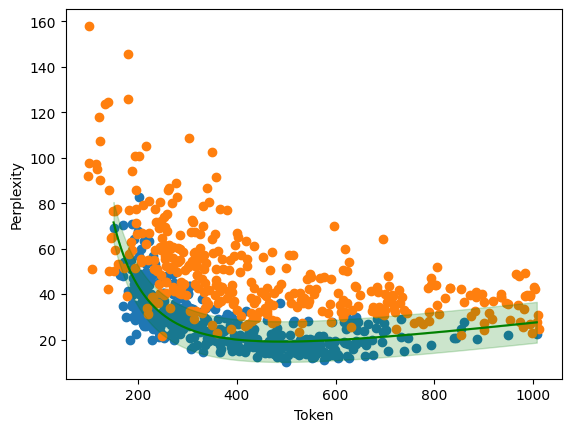

In [20]:
# fit a line to the economic data
from scipy.optimize import curve_fit

# define the true objective function
def objective(x, a, b):
	return a/x**2 + b*x

# load the dataset

# curve fit
popt, _ = curve_fit(objective, df_AI.Token, df_AI.Perplexity)
# summarize the parameter values
a, b = popt

# plot input vs output
plt.scatter(df_AI.Token, df_AI.Perplexity)
plt.scatter(df_Human.Token, df_Human.Perplexity)
plt.xlabel('Token')
plt.ylabel('Perplexity')

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(df_AI.Token), max(df_AI.Token), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function

plt.plot(x_line, y_line, color="green")
plt.fill_between(x_line, y_line, y_line+np.std(y_line), alpha=0.2, color="green")
plt.fill_between(x_line, y_line, y_line-np.std(y_line), alpha=0.2, color="green")
plt.show()

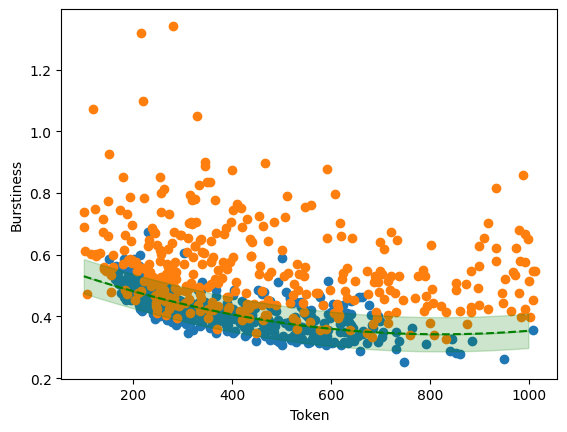

In [21]:
plt.scatter(df_AI.Token, df_AI.Burstiness)
plt.scatter(df_Human.Token, df_Human.Burstiness)
plt.xlabel('Token')
plt.ylabel('Burstiness')
linear_model = np.polyfit(df_AI.Token, df_AI.Burstiness, 2)
linear_model_fn = np.poly1d(linear_model)
x_s = np.arange(100, 1000)
plt.plot(x_s, linear_model_fn(x_s), color="green", linestyle="dashed")
plt.fill_between(x_s, linear_model_fn(x_s), linear_model_fn(x_s)+np.std(linear_model_fn(x_s)), alpha=0.2, color="green")
plt.fill_between(x_s, linear_model_fn(x_s), linear_model_fn(x_s)-np.std(linear_model_fn(x_s)), alpha=0.2, color="green")
plt.show()

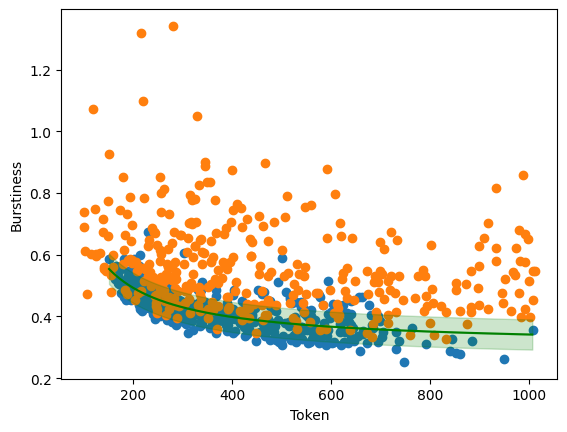

In [22]:
# fit a line to the economic data
from scipy.optimize import curve_fit

# define the true objective function
def objective(x, a, b):
	return a/x + b

# load the dataset

# curve fit
popt, _ = curve_fit(objective, df_AI.Token, df_AI.Burstiness)
# summarize the parameter values
a, b = popt

# plot input vs output
plt.scatter(df_AI.Token, df_AI.Burstiness)
plt.scatter(df_Human.Token, df_Human.Burstiness)
plt.xlabel('Token')
plt.ylabel('Burstiness')

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(df_AI.Token), max(df_AI.Token), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function

plt.plot(x_line, y_line, color="green")
plt.fill_between(x_line, y_line, y_line+np.std(y_line), alpha=0.2, color="green")
plt.fill_between(x_line, y_line, y_line-np.std(y_line), alpha=0.2, color="green")
plt.show()

In [23]:
# Define the model pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
)

rf_model = make_pipeline(StandardScaler(), RandomForestClassifier())
#rf_model = make_pipeline(StandardScaler(), ExtraTreesClassifier())
#rf_model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
#rf_model = make_pipeline(StandardScaler(), AdaBoostClassifier())

# Train the model
rf_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [24]:
# Step 6: Predict if the text is AI-generated or human-written
AI_train = rf_model.predict(X_train)
AI_predicted = rf_model.predict(X_test)
result_rf = pd.DataFrame({'AI_tested': y_test, 'AI Predicted': AI_predicted})
result_rf

,AI_tested,AI Predicted
732,0,0
361,1,1
685,1,0
754,0,0
521,1,1
...,...,...
727,0,0
106,0,0
490,0,0
753,0,0


In [25]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef

accuracy = accuracy_score(y_train, AI_train)
precision = precision_score(y_train, AI_train)
recall = recall_score(y_train, AI_train)

precision_s = precision_score(y_train, AI_train,average='micro')
recall_s    = recall_score(y_train, AI_train, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_train, AI_train):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_train, AI_train):.3f}")

Precision    :  1.000
Recall       :  1.000
F1_score     :  1.000
Accuracy     :  1.000
MCC          :  1.000
Cohen´kappa  :  1.000


In [26]:
accuracy = accuracy_score(y_test, AI_predicted)
precision = precision_score(y_test, AI_predicted)
recall = recall_score(y_test, AI_predicted)

precision_s = precision_score(y_test, AI_predicted,average='micro')
recall_s    = recall_score(y_test, AI_predicted, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_test, AI_predicted):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_test, AI_predicted):.3f}")

Precision    :  0.907
Recall       :  0.903
F1_score     :  0.899
Accuracy     :  0.899
MCC          :  0.796
Cohen´kappa  :  0.796


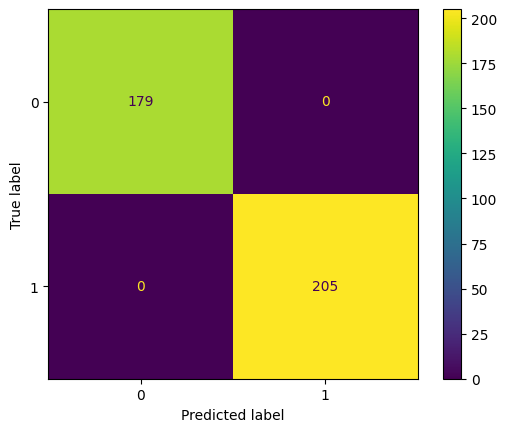

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_train, AI_train)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

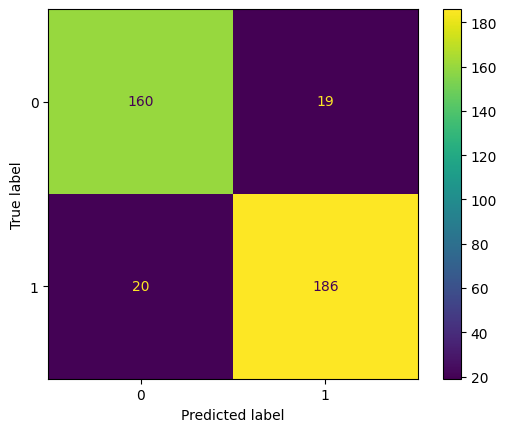

In [28]:
# Create the confusion matrix
cm = confusion_matrix(y_test, AI_predicted)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [29]:
df['AI Metric'].value_counts()[0]

358

In [30]:
df['AI Metric'].value_counts()[1]

411

In [31]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = df[(df['AI Metric']==1)]
df_minority = df[(df['AI Metric']==0)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= df['AI Metric'].value_counts()[1], # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [32]:
df_upsampled['AI Metric'].value_counts()[0]

411

In [33]:
df_upsampled['AI Metric'].value_counts()[1]

411

In [34]:
X = df_upsampled.drop(columns=['index', 'text', 'AI Metric'])
y = df_upsampled['AI Metric']

In [35]:
X = df_upsampled[[*feature_list[:num_dimensions]]]
X

,word counts,Token,Perplexity,character counts
240,363,545,35.438610,2524
809,215,337,36.907997,1360
651,154,277,41.481010,1067
250,159,282,60.368111,1029
161,316,506,57.417149,2189
...,...,...,...,...
826,326,457,16.812326,2237
827,160,233,24.948395,1203
829,398,560,13.802768,2684
832,166,254,29.366741,1250


In [36]:
# Train-test split (here using the same data for simplicity)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Define the model pipeline

rf_model = make_pipeline(StandardScaler(), RandomForestClassifier())
#rf_model = make_pipeline(StandardScaler(), ExtraTreesClassifier())
#rf_model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
#rf_model = make_pipeline(StandardScaler(), AdaBoostClassifier())

# Train the model
rf_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [37]:
# Step 6: Predict if the text is AI-generated or human-written
AI_train = rf_model.predict(X_train)
AI_predicted = rf_model.predict(X_test)
result_rf = pd.DataFrame({'AI_tested': y_test, 'AI Predicted': AI_predicted})
result_rf

,AI_tested,AI Predicted
414,1,1
617,0,0
106,0,0
450,0,0
268,0,0
...,...,...
716,1,1
30,0,0
308,0,0
358,1,1


In [38]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef

accuracy = accuracy_score(y_train, AI_train)
precision = precision_score(y_train, AI_train)
recall = recall_score(y_train, AI_train)

precision_s = precision_score(y_train, AI_train,average='micro')
recall_s    = recall_score(y_train, AI_train, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_train, AI_train):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_train, AI_train):.3f}")

Precision    :  1.000
Recall       :  1.000
F1_score     :  1.000
Accuracy     :  1.000
MCC          :  1.000
Cohen´kappa  :  1.000


In [39]:
accuracy = accuracy_score(y_test, AI_predicted)
precision = precision_score(y_test, AI_predicted)
recall = recall_score(y_test, AI_predicted)

precision_s = precision_score(y_test, AI_predicted,average='micro')
recall_s    = recall_score(y_test, AI_predicted, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_test, AI_predicted):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_test, AI_predicted):.3f}")

Precision    :  0.904
Recall       :  0.931
F1_score     :  0.917
Accuracy     :  0.917
MCC          :  0.835
Cohen´kappa  :  0.835


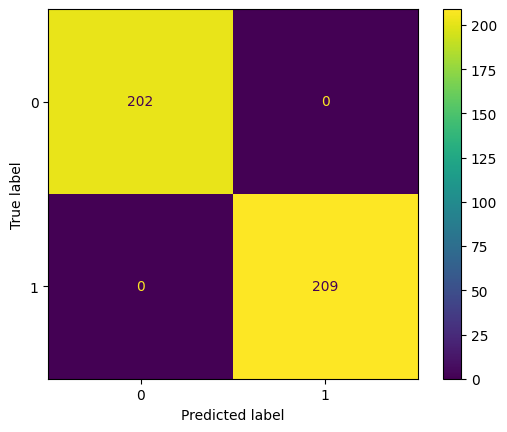

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_train, AI_train)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

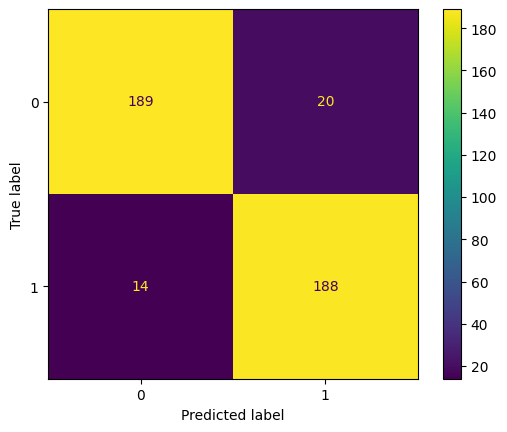

In [41]:
# Create the confusion matrix
cm = confusion_matrix(y_test, AI_predicted)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [42]:
df.to_excel("text_classification.xlsx")
from google.colab import files
files.download("text_classification.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
#save model
import pickle

with open("rf_model.pkl", "wb") as f:
     pickle.dump(rf_model, f)

#load model
with open("rf_model.pkl", "rb") as f:
     best_rf = pickle.load(f) # Use pickle.load to load the model

In [44]:
# Train-test split (here using the same data for simplicity)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Define the model pipeline

#rf_model = make_pipeline(StandardScaler(), RandomForestClassifier())
et_model = make_pipeline(StandardScaler(), ExtraTreesClassifier())
#rf_model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
#rf_model = make_pipeline(StandardScaler(), AdaBoostClassifier())

# Train the model
et_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('extratreesclassifier', ExtraTreesClassifier())])

In [45]:
# Step 6: Predict if the text is AI-generated or human-written
AI_train = et_model.predict(X_train)
AI_predicted = et_model.predict(X_test)
result_et = pd.DataFrame({'AI_tested': y_test, 'AI Predicted': AI_predicted})
result_et

,AI_tested,AI Predicted
414,1,1
617,0,0
106,0,0
450,0,0
268,0,0
...,...,...
716,1,1
30,0,0
308,0,0
358,1,1


In [46]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef

accuracy = accuracy_score(y_train, AI_train)
precision = precision_score(y_train, AI_train)
recall = recall_score(y_train, AI_train)

precision_s = precision_score(y_train, AI_train,average='micro')
recall_s    = recall_score(y_train, AI_train, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_train, AI_train):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_train, AI_train):.3f}")

Precision    :  1.000
Recall       :  1.000
F1_score     :  1.000
Accuracy     :  1.000
MCC          :  1.000
Cohen´kappa  :  1.000


In [47]:
accuracy = accuracy_score(y_test, AI_predicted)
precision = precision_score(y_test, AI_predicted)
recall = recall_score(y_test, AI_predicted)

precision_s = precision_score(y_test, AI_predicted,average='micro')
recall_s    = recall_score(y_test, AI_predicted, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_test, AI_predicted):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_test, AI_predicted):.3f}")

Precision    :  0.931
Recall       :  0.941
F1_score     :  0.937
Accuracy     :  0.937
MCC          :  0.874
Cohen´kappa  :  0.873


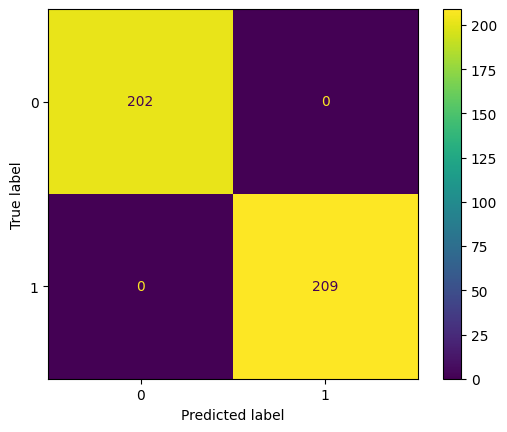

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_train, AI_train)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

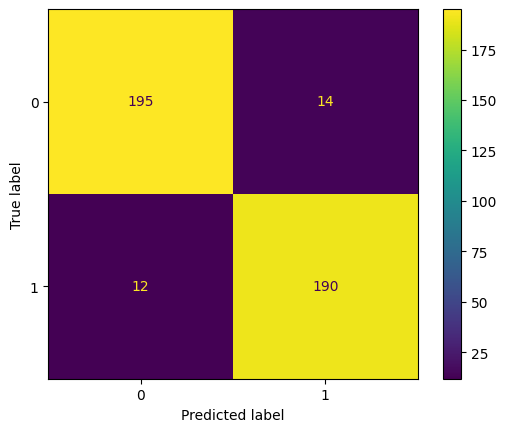

In [49]:
# Create the confusion matrix
cm = confusion_matrix(y_test, AI_predicted)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [50]:
#save model
import pickle

with open("et_model.pkl", "wb") as f:
     pickle.dump(et_model, f)

#load model
with open("et_model.pkl", "rb") as f:
     best_et = pickle.load(f) # Use pickle.load to load the model

In [51]:
# Train-test split (here using the same data for simplicity)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Define the model pipeline

#rf_model = make_pipeline(StandardScaler(), RandomForestClassifier())
#et_model = make_pipeline(StandardScaler(), ExtraTreesClassifier())
#rf_model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
ab_model = make_pipeline(StandardScaler(), AdaBoostClassifier())

# Train the model
ab_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier())])

In [52]:
# Step 6: Predict if the text is AI-generated or human-written
AI_train = ab_model.predict(X_train)
AI_predicted = ab_model.predict(X_test)
result_ab = pd.DataFrame({'AI_tested': y_test, 'AI Predicted': AI_predicted})
result_ab

,AI_tested,AI Predicted
414,1,1
617,0,0
106,0,0
450,0,0
268,0,0
...,...,...
716,1,1
30,0,0
308,0,0
358,1,1


In [53]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef

accuracy = accuracy_score(y_train, AI_train)
precision = precision_score(y_train, AI_train)
recall = recall_score(y_train, AI_train)

precision_s = precision_score(y_train, AI_train,average='micro')
recall_s    = recall_score(y_train, AI_train, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_train, AI_train):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_train, AI_train):.3f}")

Precision    :  0.985
Recall       :  0.967
F1_score     :  0.976
Accuracy     :  0.976
MCC          :  0.952
Cohen´kappa  :  0.951


In [54]:
accuracy = accuracy_score(y_test, AI_predicted)
precision = precision_score(y_test, AI_predicted)
recall = recall_score(y_test, AI_predicted)

precision_s = precision_score(y_test, AI_predicted,average='micro')
recall_s    = recall_score(y_test, AI_predicted, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_test, AI_predicted):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_test, AI_predicted):.3f}")

Precision    :  0.907
Recall       :  0.916
F1_score     :  0.912
Accuracy     :  0.912
MCC          :  0.825
Cohen´kappa  :  0.825


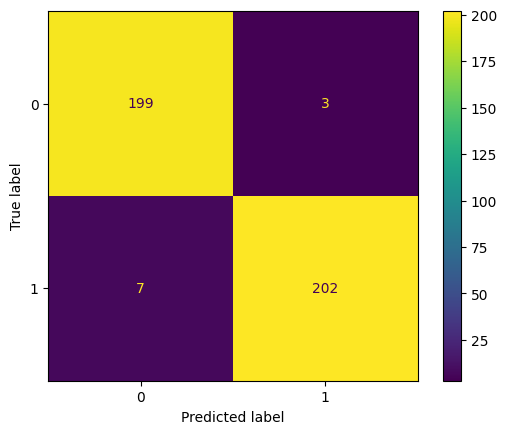

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_train, AI_train)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

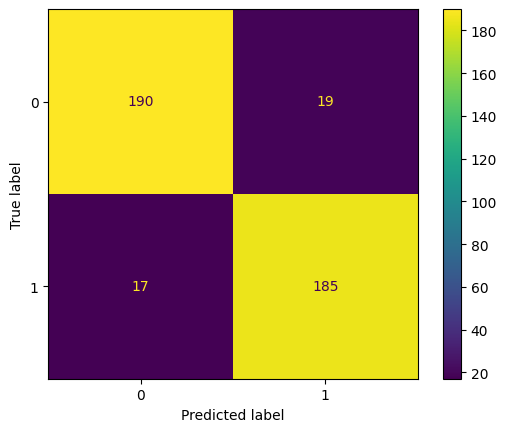

In [56]:
# Create the confusion matrix
cm = confusion_matrix(y_test, AI_predicted)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [57]:
#save model
import pickle

with open("ab_model.pkl", "wb") as f:
     pickle.dump(ab_model, f)

#load model
with open("ab_model.pkl", "rb") as f:
     best_ab = pickle.load(f) # Use pickle.load to load the model

In [58]:
# Train-test split (here using the same data for simplicity)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Define the model pipeline

#rf_model = make_pipeline(StandardScaler(), RandomForestClassifier())
#et_model = make_pipeline(StandardScaler(), ExtraTreesClassifier())
dt_model = make_pipeline(StandardScaler(), DecisionTreeClassifier())
#ab_model = make_pipeline(StandardScaler(), AdaBoostClassifier())

# Train the model
dt_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [59]:
# Step 6: Predict if the text is AI-generated or human-written
AI_train = dt_model.predict(X_train)
AI_predicted = dt_model.predict(X_test)
result_dt = pd.DataFrame({'AI_tested': y_test, 'AI Predicted': AI_predicted})
result_dt

,AI_tested,AI Predicted
414,1,1
617,0,0
106,0,0
450,0,0
268,0,0
...,...,...
716,1,1
30,0,0
308,0,0
358,1,1


In [60]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef

accuracy = accuracy_score(y_train, AI_train)
precision = precision_score(y_train, AI_train)
recall = recall_score(y_train, AI_train)

precision_s = precision_score(y_train, AI_train,average='micro')
recall_s    = recall_score(y_train, AI_train, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_train, AI_train):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_train, AI_train):.3f}")

Precision    :  1.000
Recall       :  1.000
F1_score     :  1.000
Accuracy     :  1.000
MCC          :  1.000
Cohen´kappa  :  1.000


In [61]:
accuracy = accuracy_score(y_test, AI_predicted)
precision = precision_score(y_test, AI_predicted)
recall = recall_score(y_test, AI_predicted)

precision_s = precision_score(y_test, AI_predicted,average='micro')
recall_s    = recall_score(y_test, AI_predicted, average='micro')

print(f"Precision    :  {precision:.3f}")
print(f"Recall       :  {recall:.3f}")
print(f"F1_score     :  {2*((precision_s*recall_s)/(precision_s + recall_s)):.3f}")
print(f"Accuracy     :  {accuracy:.3f}")
print(f"MCC          :  {matthews_corrcoef(y_test, AI_predicted):.3f}")
print(f"Cohen´kappa  :  {cohen_kappa_score(y_test, AI_predicted):.3f}")

Precision    :  0.859
Recall       :  0.876
F1_score     :  0.869
Accuracy     :  0.869
MCC          :  0.737
Cohen´kappa  :  0.737


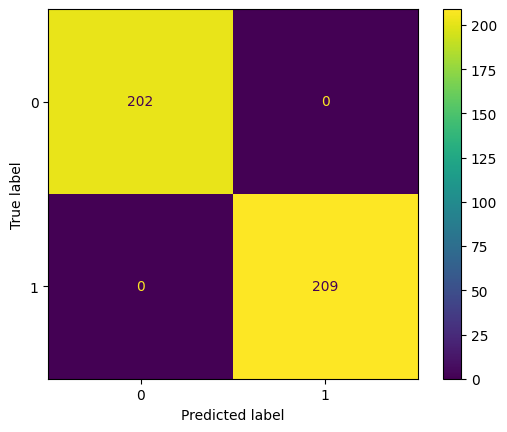

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_train, AI_train)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

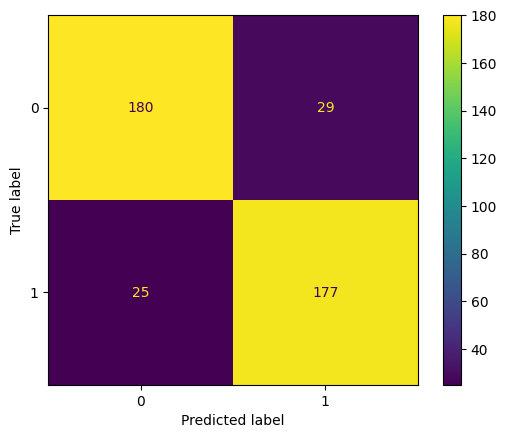

In [63]:
# Create the confusion matrix
cm = confusion_matrix(y_test, AI_predicted)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [64]:
#save model
import pickle

with open("dt_model.pkl", "wb") as f:
     pickle.dump(dt_model, f)

#load model
with open("dt_model.pkl", "rb") as f:
     best_dt = pickle.load(f) # Use pickle.load to load the model